In [1]:
import numpy as np
import pandas as pd

In [2]:
df =  pd.read_csv("wearable_data.csv")
df.head()

,User_ID,Age,Gender,Weight,Height,Medical_Conditions,Medication,Smoker,Alcohol_Consumption,Timestamp,...,Ambient_Temperature,Battery_Level,Body_Fat_Percentage,Muscle_Mass,Altitude,UV_Exposure,Notifications_Received,Screen_Time,Health_Score,Anomaly_Flag
0,U_00001,61,Female,116.881827,146.140001,NaN,No,Yes,Moderate,2021-01-01 00:00:00,...,15.587789,4.395183,17.901052,47.032175,3241.914154,7.562890,52,1.814814,66.730939,1
1,U_00002,24,Other,146.140091,167.731242,NaN,No,No,Heavy,2021-01-01 01:00:00,...,18.730908,97.634516,15.572783,46.135678,3710.101830,3.033488,99,7.865145,22.346554,1
2,U_00003,81,Male,35.904063,170.920038,Hypertension,Yes,Yes,Moderate,2021-01-01 02:00:00,...,40.093158,1.080573,10.031448,38.153122,4960.072149,3.746323,98,7.173805,74.686736,0
3,U_00004,70,Male,107.167251,176.456448,Diabetes,No,No,NaN,2021-01-01 03:00:00,...,28.775765,76.683681,27.987767,37.370333,3463.382361,5.896902,6,7.755346,38.757816,0
4,U_00005,30,Male,91.480042,163.988038,NaN,No,Yes,Moderate,2021-01-01 04:00:00,...,38.895837,78.488377,23.087857,36.558111,2228.276786,2.961103,32,6.188529,37.236317,1


In [3]:
df.dtypes

User_ID                    object
Age                         int64
Gender                     object
Weight                    float64
Height                    float64
Medical_Conditions         object
Medication                 object
Smoker                     object
Alcohol_Consumption        object
Timestamp                  object
Day_of_Week                object
Sleep_Duration            float64
Deep_Sleep_Duration       float64
REM_Sleep_Duration        float64
Wakeups                     int64
Snoring                    object
Heart_Rate                  int64
Blood_Oxygen_Level        float64
ECG                        object
Steps                       int64
Calories_Burned           float64
Distance_Covered          float64
Exercise_Type              object
Exercise_Duration         float64
Exercise_Intensity         object
Calories_Intake           float64
Water_Intake              float64
Stress_Level               object
Mood                       object
Skin_Temperatu

In [4]:
df.columnsD:\wearables_de_project\activity_environment_data.csv

Index(['User_ID', 'Age', 'Gender', 'Weight', 'Height', 'Medical_Conditions',
       'Medication', 'Smoker', 'Alcohol_Consumption', 'Timestamp',
       'Day_of_Week', 'Sleep_Duration', 'Deep_Sleep_Duration',
       'REM_Sleep_Duration', 'Wakeups', 'Snoring', 'Heart_Rate',
       'Blood_Oxygen_Level', 'ECG', 'Steps', 'Calories_Burned',
       'Distance_Covered', 'Exercise_Type', 'Exercise_Duration',
       'Exercise_Intensity', 'Calories_Intake', 'Water_Intake', 'Stress_Level',
       'Mood', 'Skin_Temperature', 'Ambient_Temperature', 'Battery_Level',
       'Body_Fat_Percentage', 'Muscle_Mass', 'Altitude', 'UV_Exposure',
       'Notifications_Received', 'Screen_Time', 'Health_Score',
       'Anomaly_Flag'],
      dtype='object')

In [5]:
# Checking for missing values
missing_data = df.isnull().sum()

# Display missing values for each column
print(missing_data)

User_ID                       0
Age                           0
Gender                        0
Weight                        0
Height                        0
Medical_Conditions        33193
Medication                    0
Smoker                        0
Alcohol_Consumption       33383
Timestamp                     0
Day_of_Week                   0
Sleep_Duration                0
Deep_Sleep_Duration           0
REM_Sleep_Duration            0
Wakeups                       0
Snoring                       0
Heart_Rate                    0
Blood_Oxygen_Level            0
ECG                           0
Steps                         0
Calories_Burned               0
Distance_Covered              0
Exercise_Type             24910
Exercise_Duration             0
Exercise_Intensity        24910
Calories_Intake               0
Water_Intake                  0
Stress_Level                  0
Mood                          0
Skin_Temperature              0
Ambient_Temperature           0
Battery_

Medical_Conditions:
Since the Medical_Conditions has a significant number of missing values, it might indicate that a user doesn't have any notable medical condition. We can fill NaN values with a new category, say 'None'.
python

Alcohol_Consumption:
Given that the missing value could represent users who might not consume alcohol or didn't mention it, let's fill NaN with 'Not Mentioned'.<br>
Exercise_Type and Exercise_Intensity:
Missing values here might mean that the user did not exercise or the device couldn't capture it. We can replace NaN values in Exercise_Type with 'No Exercise' and in Exercise_Intensity with 'None'.<br>


In [8]:
df['Medical_Conditions'].fillna('None', inplace=True)
df['Alcohol_Consumption'].fillna('Not Mentioned', inplace=True)
df['Exercise_Type'].fillna('No Exercise', inplace=True)
df['Exercise_Intensity'].fillna('None', inplace=True)



In [9]:
df['Exercise_Type'].fillna('No Exercise', inplace=True)
df['Exercise_Intensity'].fillna('None', inplace=True)


In [10]:
print(df.describe())


                 Age         Weight         Height  Sleep_Duration  \
count  100000.000000  100000.000000  100000.000000   100000.000000   
mean       47.304490      90.570208     170.503831        6.998959   
std        21.924824      34.968633      17.584193        1.731454   
min        10.000000      30.000278     140.000136        4.000136   
25%        28.000000      60.238265     155.258757        5.503837   
50%        47.000000      90.543063     170.481357        6.993687   
75%        66.000000     120.686172     185.736605        8.503148   
max        85.000000     150.997941     200.999671        9.999970   

       Deep_Sleep_Duration  REM_Sleep_Duration        Wakeups     Heart_Rate  \
count        100000.000000       100000.000000  100000.000000  100000.000000   
mean              3.750907            3.248052       1.999480     114.848200   
std               2.120214            2.123195       1.413775      37.848364   
min               0.500206            0.000067   

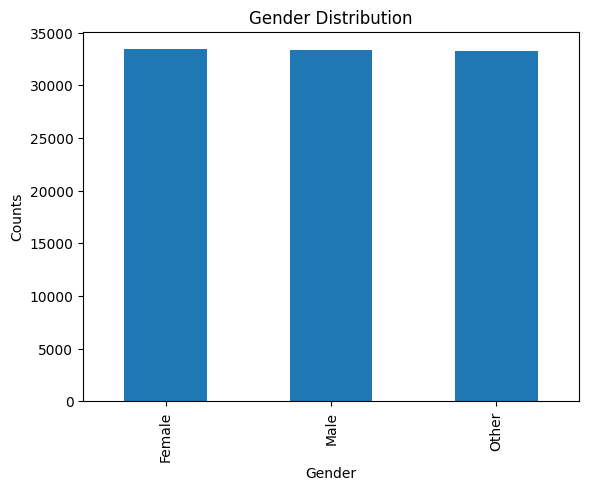

In [11]:
import matplotlib.pyplot as plt

gender_counts = df['Gender'].value_counts()
gender_counts.plot(kind='bar')
plt.title('Gender Distribution')
plt.ylabel('Counts')
plt.xlabel('Gender')
plt.show()


In [12]:
import seaborn as sns

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'U_00001'

Feature Engineering:
BMI Calculation: Body Mass Index (BMI) can be a useful metric as it relates weight to height and can provide insight into an individual's health. Let's create a BMI column.

Age Grouping: Grouping ages can be a helpful feature for understanding health trends across different age groups.

Day and Hour from Timestamp: Extracting day and hour might help in understanding user behavior at different times.

Sleep Quality: Based on deep sleep and REM sleep durations, we can create a metric to gauge sleep quality.



In [13]:
df['BMI'] = df['Weight'] / (df['Height']/100)**2
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df['Hour'] = pd.to_datetime(df['Timestamp']).dt.hour
df['Sleep_Quality'] = (df['Deep_Sleep_Duration'] + df['REM_Sleep_Duration']) / df['Sleep_Duration']


In [14]:
avg_steps_age = df.groupby('Age_Group')['Steps'].mean()
print(avg_steps_age)


Age_Group
10-20     9998.750206
20-30    10032.270915
30-40    10074.095490
40-50     9912.876338
50-60     9977.279711
60-70     9984.538157
70-80     9978.676387
80-90     9980.672571
Name: Steps, dtype: float64


In [15]:
avg_sleep_quality_age = df.groupby('Age_Group')['Sleep_Quality'].mean()
print(avg_sleep_quality_age)


Age_Group
10-20    1.0
20-30    1.0
30-40    1.0
40-50    1.0
50-60    1.0
60-70    1.0
70-80    1.0
80-90    1.0
Name: Sleep_Quality, dtype: float64


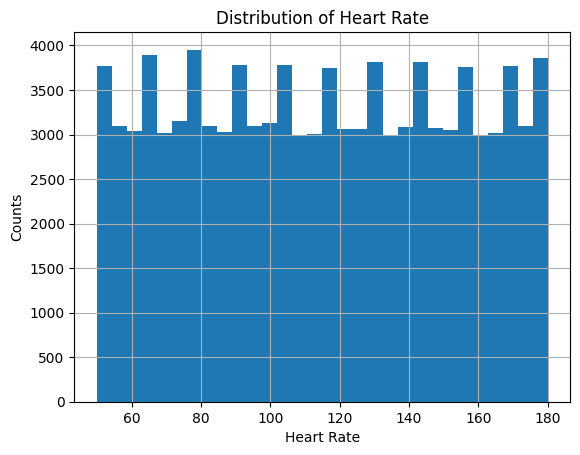

In [16]:
df['Heart_Rate'].hist(bins=30)
plt.title('Distribution of Heart Rate')
plt.xlabel('Heart Rate')
plt.ylabel('Counts')
plt.show()


In [17]:
def bmi_recommendation(bmi):
    if bmi < 18.5:
        return "Underweight: Consult with a nutritionist."
    elif 18.5 <= bmi < 24.9:
        return "Normal: Maintain your healthy lifestyle!"
    elif 24.9 <= bmi < 30:
        return "Overweight: Incorporate more physical activity and balanced diet."
    else:
        return "Obesity: Consult with a healthcare professional."
    
df['BMI_Recommendation'] = df['BMI'].apply(bmi_recommendation)


In [18]:
def dehydration_risk(row):
    if row['Water_Intake'] < 1000 and row['Ambient_Temperature'] > 30:
        return "High Risk"
    elif row['Water_Intake'] < 1500:
        return "Moderate Risk"
    else:
        return "Low Risk"

df['Dehydration_Risk'] = df.apply(dehydration_risk, axis=1)


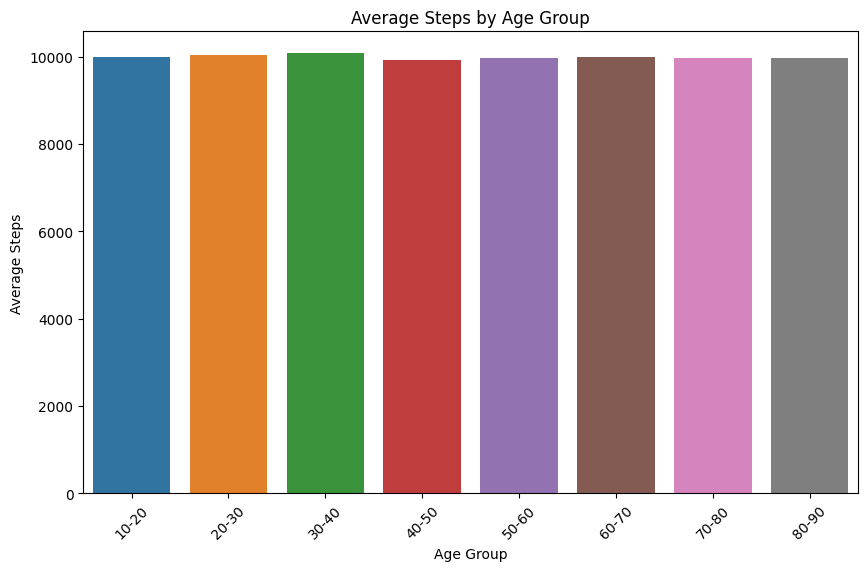

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=avg_steps_age.index, y=avg_steps_age.values)
plt.title('Average Steps by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Steps')
plt.xticks(rotation=45)
plt.show()


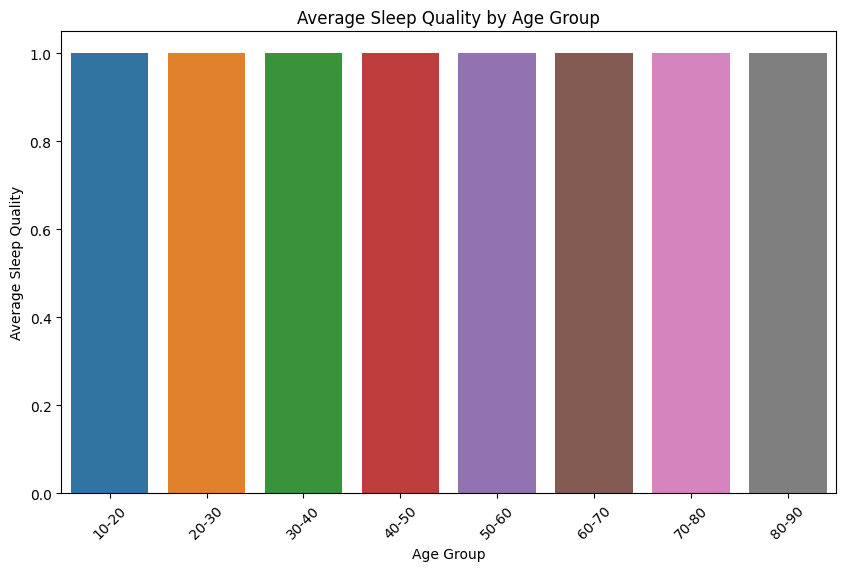

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x=avg_sleep_quality_age.index, y=avg_sleep_quality_age.values)
plt.title('Average Sleep Quality by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Sleep Quality')
plt.xticks(rotation=45)
plt.show()


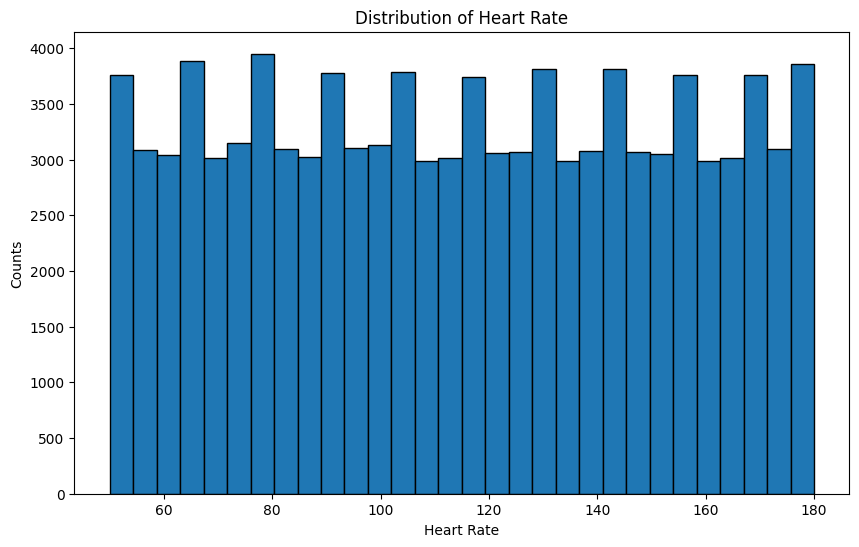

In [22]:
plt.figure(figsize=(10,6))
df['Heart_Rate'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Heart Rate')
plt.xlabel('Heart Rate')
plt.ylabel('Counts')
plt.grid(False)
plt.show()


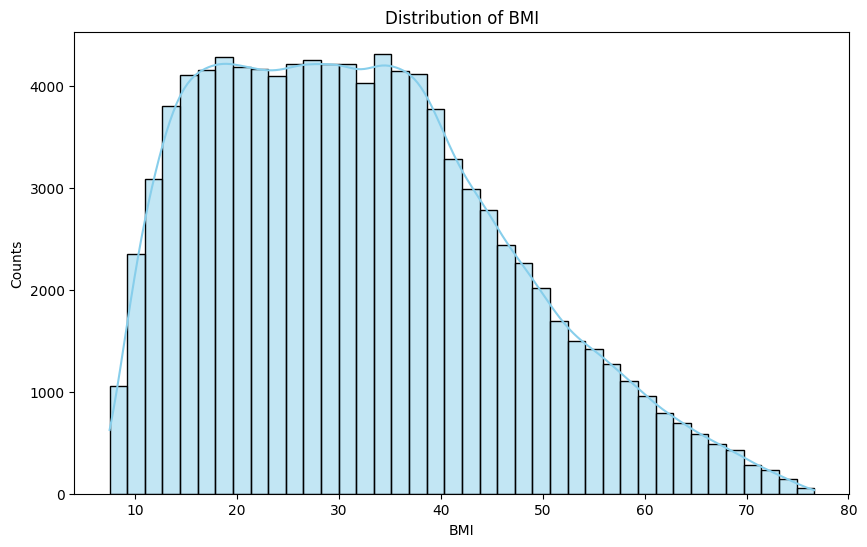

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(df['BMI'], kde=True, bins=40, color="skyblue", edgecolor='black')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Counts')
plt.grid(False)
plt.show()


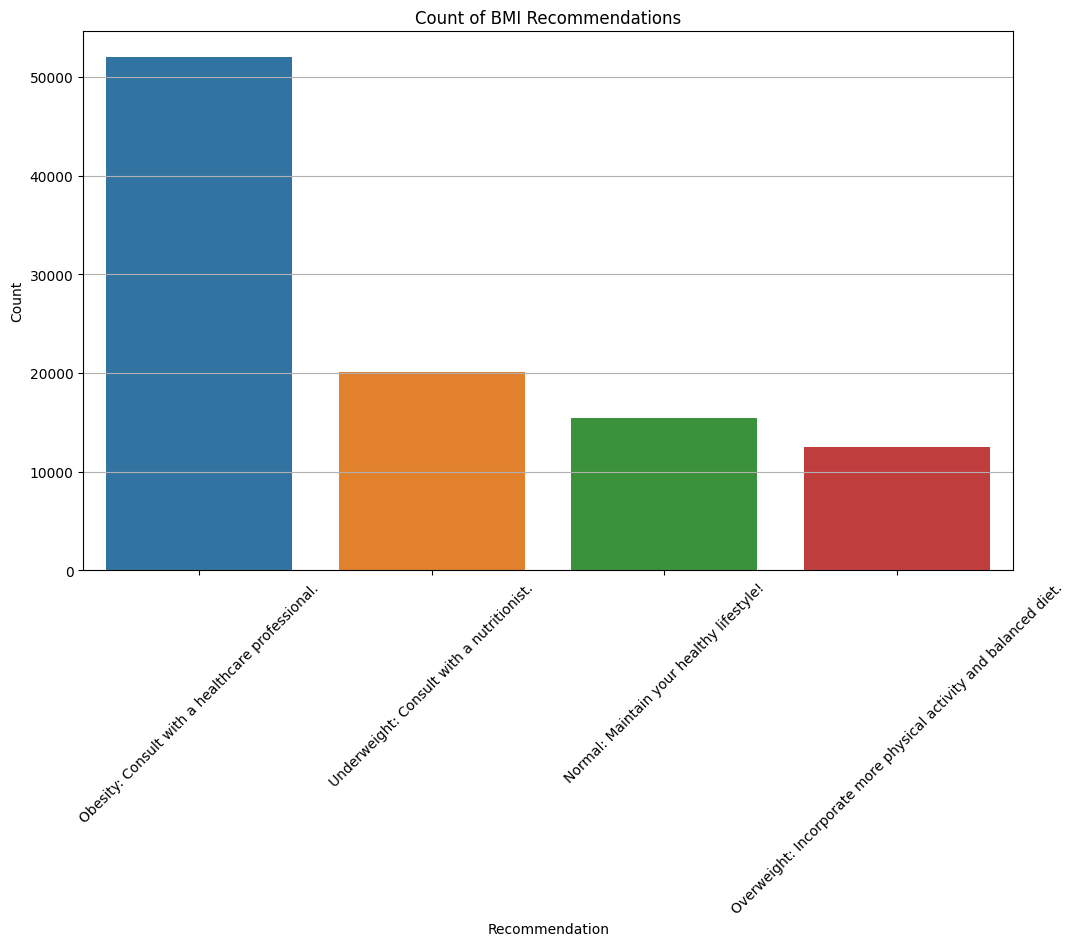

In [24]:
plt.figure(figsize=(12,7))
sns.countplot(x='BMI_Recommendation', data=df, order=df['BMI_Recommendation'].value_counts().index)
plt.title('Count of BMI Recommendations')
plt.xlabel('Recommendation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


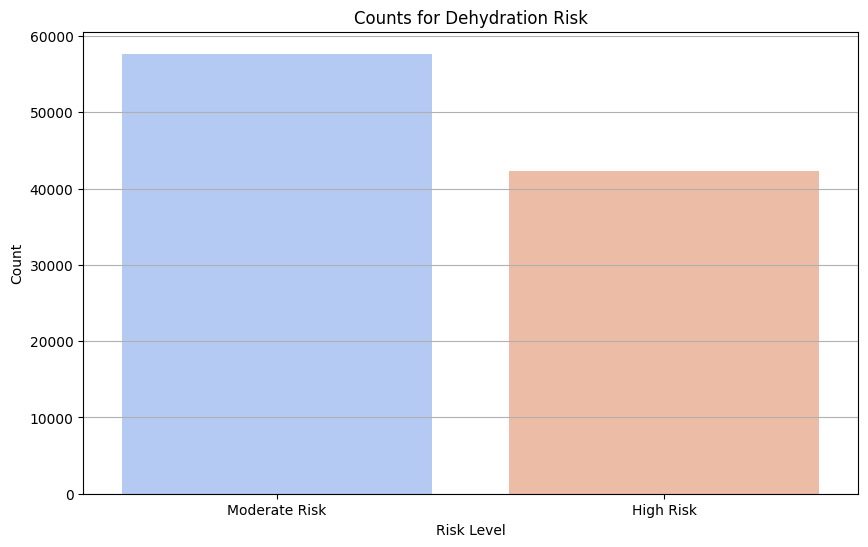

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x='Dehydration_Risk', data=df, order=df['Dehydration_Risk'].value_counts().index, palette='coolwarm')
plt.title('Counts for Dehydration Risk')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


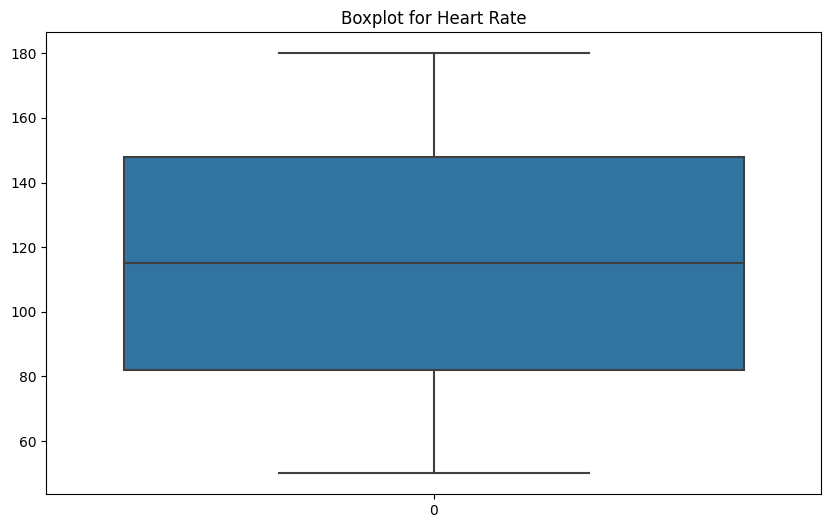

In [26]:
# Visualizing outliers using boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df['Heart_Rate'])
plt.title('Boxplot for Heart Rate')
plt.show()


In [29]:
numeric_cols = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_cols.corr()


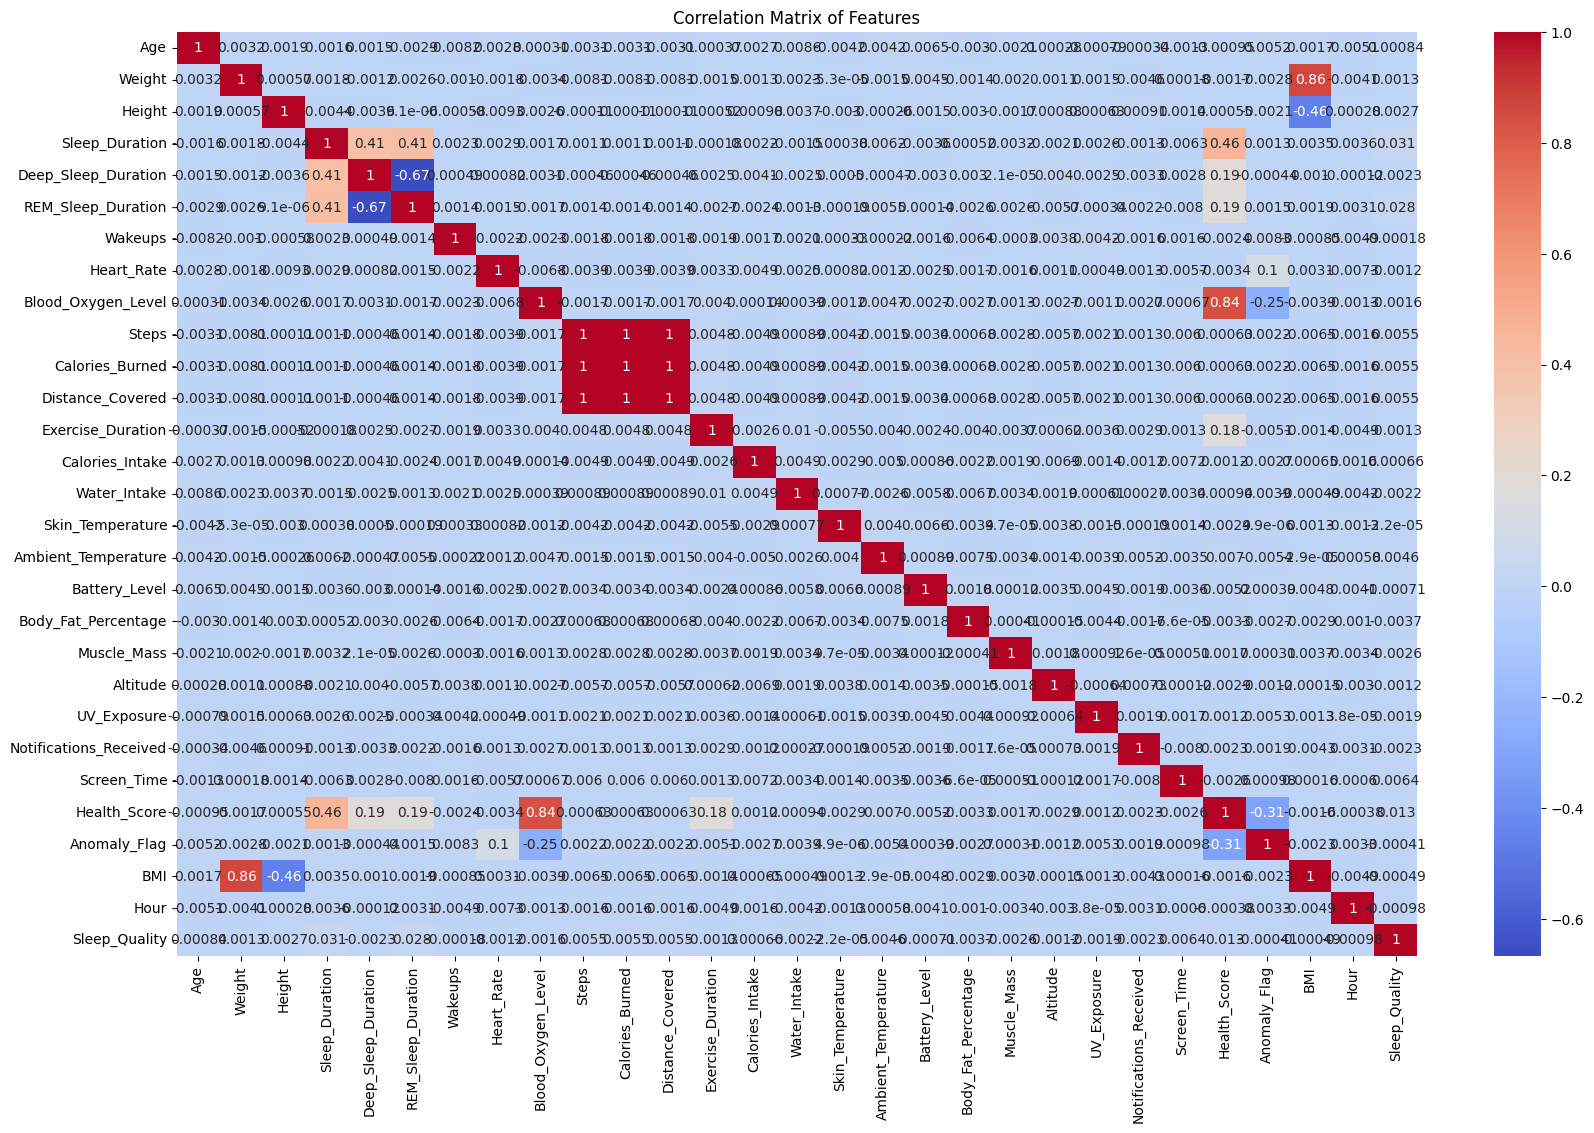

In [30]:
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix of Features')
plt.show()

In [37]:
df = df.dropna(subset=['Medical_Conditions', 'Alcohol_Consumption', 'Exercise_Type'])
# For a numerical column:
df['Column_Name'].fillna(df['Column_Name'].mean(), inplace=True)

# For a categorical column:
df['Medical_Conditions'].fillna(df['Medical_Conditions'].mode()[0], inplace=True)
# One-hot encode the categorical columns
df_encoded = pd.get_dummies(df, columns=['Medical_Conditions', 'Alcohol_Consumption', 'Exercise_Type'])


KeyError: 'Column_Name'

In [36]:
# For categorical columns:
df['Medical_Conditions'].fillna(df['Medical_Conditions'].mode()[0], inplace=True)
df['Alcohol_Consumption'].fillna(df['Alcohol_Consumption'].mode()[0], inplace=True)
df['Exercise_Type'].fillna(df['Exercise_Type'].mode()[0], inplace=True)

# One-hot encoding
df_encoded = pd.get_dummies(df, columns=['Medical_Conditions', 'Alcohol_Consumption', 'Exercise_Type'])

# Now df_encoded is ready for analysis!


In [38]:
df_encoded.head()

,User_ID,Age,Gender,Weight,Height,Medication,Smoker,Timestamp,Day_of_Week,Sleep_Duration,...,Medical_Conditions_Diabetes,Medical_Conditions_Hypertension,Medical_Conditions_None,Alcohol_Consumption_Heavy,Alcohol_Consumption_Moderate,Alcohol_Consumption_Not Mentioned,Exercise_Type_No Exercise,Exercise_Type_Running,Exercise_Type_Strength Training,Exercise_Type_Yoga
0,U_00001,61,Female,116.881827,146.140001,No,Yes,2021-01-01 00:00:00,Friday,8.289341,...,False,False,True,False,True,False,False,False,True,False
1,U_00002,24,Other,146.140091,167.731242,No,No,2021-01-01 01:00:00,Friday,4.484992,...,False,False,True,True,False,False,False,False,True,False
2,U_00003,81,Male,35.904063,170.920038,Yes,Yes,2021-01-01 02:00:00,Friday,6.702545,...,False,True,False,False,True,False,False,True,False,False
3,U_00004,70,Male,107.167251,176.456448,No,No,2021-01-01 03:00:00,Friday,4.141764,...,True,False,False,False,False,True,False,False,True,False
4,U_00005,30,Male,91.480042,163.988038,No,Yes,2021-01-01 04:00:00,Friday,4.950772,...,False,False,True,False,True,False,False,True,False,False


In [39]:
df_encoded.columns

Index(['User_ID', 'Age', 'Gender', 'Weight', 'Height', 'Medication', 'Smoker',
       'Timestamp', 'Day_of_Week', 'Sleep_Duration', 'Deep_Sleep_Duration',
       'REM_Sleep_Duration', 'Wakeups', 'Snoring', 'Heart_Rate',
       'Blood_Oxygen_Level', 'ECG', 'Steps', 'Calories_Burned',
       'Distance_Covered', 'Exercise_Duration', 'Exercise_Intensity',
       'Calories_Intake', 'Water_Intake', 'Stress_Level', 'Mood',
       'Skin_Temperature', 'Ambient_Temperature', 'Battery_Level',
       'Body_Fat_Percentage', 'Muscle_Mass', 'Altitude', 'UV_Exposure',
       'Notifications_Received', 'Screen_Time', 'Health_Score', 'Anomaly_Flag',
       'BMI', 'Age_Group', 'Hour', 'Sleep_Quality', 'BMI_Recommendation',
       'Dehydration_Risk', 'Medical_Conditions_Diabetes',
       'Medical_Conditions_Hypertension', 'Medical_Conditions_None',
       'Alcohol_Consumption_Heavy', 'Alcohol_Consumption_Moderate',
       'Alcohol_Consumption_Not Mentioned', 'Exercise_Type_No Exercise',
       'Exercise_Ty

df_encoded.co

In [45]:
# Imputing numerical columns with the mean
for column in ['Age', 'Weight', 'Height', 'Sleep_Duration']:
    df[column].fillna(df_encoded[column].mean(), inplace=True)

# Imputing categorical columns with the mode
for column in ['Gender', 'Medication', 'Smoker', 'Day_of_Week']:
    df_encoded[column].fillna(df_encoded[column].mode()[0], inplace=True)

# Check if there are any more missing values left
print(df_encoded.isnull().sum())


User_ID                              0
Age                                  0
Gender                               0
Weight                               0
Height                               0
Medication                           0
Smoker                               0
Timestamp                            0
Day_of_Week                          0
Sleep_Duration                       0
Deep_Sleep_Duration                  0
REM_Sleep_Duration                   0
Wakeups                              0
Snoring                              0
Heart_Rate                           0
Blood_Oxygen_Level                   0
ECG                                  0
Steps                                0
Calories_Burned                      0
Distance_Covered                     0
Exercise_Duration                    0
Exercise_Intensity                   0
Calories_Intake                      0
Water_Intake                         0
Stress_Level                         0
Mood                     

In [46]:
df_encoded.shape

(100000, 53)

In [48]:
print(df_encoded[['Exercise_Duration', 'Exercise_Intensity']].dtypes)
non_numeric_duration = pd.to_numeric(df_encoded['Exercise_Duration'], errors='coerce').isna()
non_numeric_intensity = pd.to_numeric(df_encoded['Exercise_Intensity'], errors='coerce').isna()

print("Non-numeric Exercise_Duration rows:")
print(df_encoded[non_numeric_duration]['Exercise_Duration'])

print("\nNon-numeric Exercise_Intensity rows:")
print(df_encoded[non_numeric_intensity]['Exercise_Intensity'])


Exercise_Duration     float64
Exercise_Intensity     object
dtype: object
Non-numeric Exercise_Duration rows:
Series([], Name: Exercise_Duration, dtype: float64)

Non-numeric Exercise_Intensity rows:
0             Low
1             Low
2            High
3        Moderate
4        Moderate
           ...   
99995        None
99996        High
99997        None
99998        High
99999    Moderate
Name: Exercise_Intensity, Length: 100000, dtype: object


In [50]:
cols_to_check = ['Exercise_Duration', 'Exercise_Intensity', 'Sleep_Duration', 'Deep_Sleep_Duration', 'Calories_Burned', 'Calories_Intake']

for col in cols_to_check:
    print(f"--- {col} ---")
    print(df_encoded[col].unique())
    print("\n")


--- Exercise_Duration ---
[0.61103846 1.63240523 1.60170271 ... 1.38318579 0.53833254 1.17905529]


--- Exercise_Intensity ---
['Low' 'High' 'Moderate' 'None']


--- Sleep_Duration ---
[8.28934115 4.48499176 6.70254503 ... 9.43070463 7.47038382 7.75142267]


--- Deep_Sleep_Duration ---
[1.59223408 1.03042316 4.13087001 ... 3.37706483 6.92754765 7.26425096]


--- Calories_Burned ---
[800.9  515.4  616.7  ... 335.15 704.55 150.9 ]


--- Calories_Intake ---
[1502.19634223 2938.30292116 2361.10880069 ... 1681.96392742 2282.57392974
 2090.05898653]




In [54]:
print(df_encoded[cols_to_check].dtypes)


Exercise_Duration      float64
Exercise_Intensity      object
Sleep_Duration         float64
Deep_Sleep_Duration    float64
Calories_Burned        float64
Calories_Intake        float64
dtype: object


In [55]:
print(df_encoded['Exercise_Intensity'].unique())


['Low' 'High' 'Moderate' 'None']


In [56]:
# Map the Exercise_Intensity values to numerical values
intensity_mapping = {
    'Low': 1,
    'Moderate': 2,
    'High': 3,
    'None': 0
}

df_encoded['Exercise_Intensity'] = df_encoded['Exercise_Intensity'].map(intensity_mapping)


In [60]:
mixed_cols = []

for col in df_encoded.columns:
    unique_types = {type(item) for item in df_encoded[col]}
    if {float, str}.issubset(unique_types):
        mixed_cols.append(col)

print("Columns with mixed data types:", mixed_cols)


Columns with mixed data types: []


In [62]:
intensity_mapping = {'Low': 1, 'Moderate': 2, 'High': 3, 'None': 0}
df_encoded['Numerical_Intensity'] = df_encoded['Exercise_Intensity'].map(intensity_mapping)
df_encoded['Physical_Activity_Level'] = df_encoded['Numerical_Intensity'] * df_encoded['Exercise_Duration']


In [64]:
df_encoded.shape

(100000, 59)

In [67]:
non_numeric_cols = df_encoded.select_dtypes(exclude=[np.number]).columns
print(non_numeric_cols)


Index(['User_ID', 'Gender', 'Medication', 'Smoker', 'Timestamp', 'Day_of_Week',
       'Snoring', 'ECG', 'Stress_Level', 'Mood', 'Age_Group',
       'BMI_Recommendation', 'Dehydration_Risk', 'Medical_Conditions_Diabetes',
       'Medical_Conditions_Hypertension', 'Medical_Conditions_None',
       'Alcohol_Consumption_Heavy', 'Alcohol_Consumption_Moderate',
       'Alcohol_Consumption_Not Mentioned', 'Exercise_Type_No Exercise',
       'Exercise_Type_Running', 'Exercise_Type_Strength Training',
       'Exercise_Type_Yoga', 'BMI_Category', 'Hydration_Status'],
      dtype='object')


In [68]:
for col in non_numeric_cols:
    print(f"{col}: {df_encoded[col].unique()}")


User_ID: ['U_00001' 'U_00002' 'U_00003' ... 'U_99998' 'U_99999' 'U_100000']
Gender: ['Female' 'Other' 'Male']
Medication: ['No' 'Yes']
Smoker: ['Yes' 'No']
Timestamp: ['2021-01-01 00:00:00' '2021-01-01 01:00:00' '2021-01-01 02:00:00' ...
 '2032-05-29 13:00:00' '2032-05-29 14:00:00' '2032-05-29 15:00:00']
Day_of_Week: ['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday']
Snoring: ['Yes' 'No']
ECG: ['Abnormal' 'Normal']
Stress_Level: ['Low' 'Moderate' 'High']
Mood: ['Neutral' 'Happy' 'Anxious' 'Sad']
Age_Group: ['60-70', '20-30', '80-90', '70-80', '30-40', '10-20', '40-50', '50-60']
Categories (8, object): ['10-20' < '20-30' < '30-40' < '40-50' < '50-60' < '60-70' < '70-80' < '80-90']
BMI_Recommendation: ['Obesity: Consult with a healthcare professional.'
 'Underweight: Consult with a nutritionist.'
 'Overweight: Incorporate more physical activity and balanced diet.'
 'Normal: Maintain your healthy lifestyle!']
Dehydration_Risk: ['Moderate Risk' 'High Risk']
Medical_Co

In [71]:
print(df_encoded.columns)


Index(['User_ID', 'Age', 'Weight', 'Height', 'Timestamp', 'Sleep_Duration',
       'Deep_Sleep_Duration', 'REM_Sleep_Duration', 'Wakeups', 'Heart_Rate',
       'Blood_Oxygen_Level', 'Steps', 'Calories_Burned', 'Distance_Covered',
       'Exercise_Duration', 'Exercise_Intensity', 'Calories_Intake',
       'Water_Intake', 'Skin_Temperature', 'Ambient_Temperature',
       'Battery_Level', 'Body_Fat_Percentage', 'Muscle_Mass', 'Altitude',
       'UV_Exposure', 'Notifications_Received', 'Screen_Time', 'Health_Score',
       'Anomaly_Flag', 'BMI', 'Age_Group', 'Hour', 'Sleep_Quality',
       'Medical_Conditions_Diabetes', 'Medical_Conditions_Hypertension',
       'Medical_Conditions_None', 'Alcohol_Consumption_Heavy',
       'Alcohol_Consumption_Moderate', 'Alcohol_Consumption_Not Mentioned',
       'Exercise_Type_No Exercise', 'Exercise_Type_Running',
       'Exercise_Type_Strength Training', 'Exercise_Type_Yoga', 'BMI_Category',
       'Physical_Activity_Level', 'Sleep_Efficiency', 'Calori

In [72]:
one_hot_cols = [col for col in one_hot_cols if col in df_encoded.columns]


In [75]:
def find_closest_column(possible_columns, target_column):
    return min(possible_columns, key=lambda x: Levenshtein.distance(x, target_column))

import Levenshtein
corrected_column = find_closest_column(df_encoded.columns, 'BMI_Category')
print(f"Did you mean {corrected_column} instead of 'BMI_Category'?")


Did you mean BMI_Category instead of 'BMI_Category'?


In [77]:
print('BMI_Category' in df_encoded.columns)


True


In [78]:
one_hot_cols = [col for col in one_hot_cols if col in df_encoded.columns]


In [79]:
import pandas as pd

# Assuming you have loaded your data into a dataframe named 'df'
# One-hot encode these categorical variables 
one_hot_cols = ['Gender', 'Medication', 'Smoker', 'Day_of_Week', 'Snoring', 
                'ECG', 'Stress_Level', 'Mood', 'BMI_Recommendation', 'Dehydration_Risk',
                'BMI_Category', 'Hydration_Status']

for col in one_hot_cols:
    df_encoded = pd.concat([df_encoded, pd.get_dummies(df[col], prefix=col)], axis=1)
    df_encoded.drop(col, axis=1, inplace=True) # drop the original column

# For 'Age_Group' which is ordinal, we can use label encoding
age_map = {'10-20': 1, '20-30': 2, '30-40': 3, '40-50': 4, '50-60': 5, 
           '60-70': 6, '70-80': 7, '80-90': 8}

df_encoded['Age_Group'] = df_encoded['Age_Group'].map(age_map)

# Drop the 'Timestamp' column as it seems it won't be directly used in modeling
df_encoded.drop('Timestamp', axis=1, inplace=True)

# The other columns seem to be already boolean or binary, so we don't need to encode them.


KeyError: "['Gender'] not found in axis"

In [80]:
df_encoded.columns

Index(['User_ID', 'Age', 'Weight', 'Height', 'Timestamp', 'Sleep_Duration',
       'Deep_Sleep_Duration', 'REM_Sleep_Duration', 'Wakeups', 'Heart_Rate',
       'Blood_Oxygen_Level', 'Steps', 'Calories_Burned', 'Distance_Covered',
       'Exercise_Duration', 'Exercise_Intensity', 'Calories_Intake',
       'Water_Intake', 'Skin_Temperature', 'Ambient_Temperature',
       'Battery_Level', 'Body_Fat_Percentage', 'Muscle_Mass', 'Altitude',
       'UV_Exposure', 'Notifications_Received', 'Screen_Time', 'Health_Score',
       'Anomaly_Flag', 'BMI', 'Age_Group', 'Hour', 'Sleep_Quality',
       'Medical_Conditions_Diabetes', 'Medical_Conditions_Hypertension',
       'Medical_Conditions_None', 'Alcohol_Consumption_Heavy',
       'Alcohol_Consumption_Moderate', 'Alcohol_Consumption_Not Mentioned',
       'Exercise_Type_No Exercise', 'Exercise_Type_Running',
       'Exercise_Type_Strength Training', 'Exercise_Type_Yoga', 'BMI_Category',
       'Physical_Activity_Level', 'Sleep_Efficiency', 'Calori

In [81]:
import pandas as pd

# Assuming you have loaded your data into a dataframe named 'df'
# Start by creating an empty dataframe for the encoded data
df_encode = df_encoded.copy()

# One-hot encode these categorical variables 
one_hot_cols = ['Gender', 'Medication', 'Smoker', 'Day_of_Week', 'Snoring', 
                'ECG', 'Stress_Level', 'Mood', 'BMI_Recommendation', 'Dehydration_Risk',
                'BMI_Category', 'Hydration_Status']

for col in one_hot_cols:
    # Only encode if the column exists in the dataframe
    if col in df_encoded.columns:
        df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded[col], prefix=col)], axis=1)
        df_encoded.drop(col, axis=1, inplace=True) # drop the original column

# For 'Age_Group' which is ordinal, we can use label encoding
age_map = {'10-20': 1, '20-30': 2, '30-40': 3, '40-50': 4, '50-60': 5, 
           '60-70': 6, '70-80': 7, '80-90': 8}

# Only map if 'Age_Group' exists in the dataframe
if 'Age_Group' in df_encoded.columns:
    df_encoded['Age_Group'] = df_encoded['Age_Group'].map(age_map)

# Drop the 'Timestamp' column if it exists in the dataframe
if 'Timestamp' in df_encoded.columns:
    df_encoded.drop('Timestamp', axis=1, inplace=True)

# The other columns seem to be already boolean or binary, so we don't need to encode them.


In [82]:
from sklearn.preprocessing import MinMaxScaler

# Columns to scale - considering 'Age_Group' for scaling as well even though it's encoded
cols_to_scale = ['Age_Group']

scaler = MinMaxScaler()
df_encoded[cols_to_scale] = scaler.fit_transform(df_encoded[cols_to_scale])